# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import main dataset (Global Monthly Statistical Electricity Production)

In [2]:
monthly_stat_production = pd.read_csv('F:\APU\FYP\Dataset\Final New Monthly\monthly_electronic_statistical.csv')
monthly_stat_production.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,23-Mar,Net Electricity Production,Electricity,22620.5048,GWh
1,Australia,23-Mar,Net Electricity Production,Total Combustible Fuels,14933.1532,GWh
2,Australia,23-Mar,Net Electricity Production,"Coal, Peat and Manufactured Gases",10545.2565,GWh
3,Australia,23-Mar,Net Electricity Production,Oil and Petroleum Products,353.6857,GWh
4,Australia,23-Mar,Net Electricity Production,Natural Gas,3776.9043,GWh


In [3]:
monthly_stat_production.shape

(131200, 6)

In [4]:
monthly_stat_production.dtypes

Country     object
Time        object
Balance     object
Product     object
Value      float64
Unit        object
dtype: object

In [5]:
monthly_stat_production['Time'] = pd.to_datetime(monthly_stat_production['Time'], format = '%y-%b')
monthly_stat_production.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,2023-03-01,Net Electricity Production,Electricity,22620.5048,GWh
1,Australia,2023-03-01,Net Electricity Production,Total Combustible Fuels,14933.1532,GWh
2,Australia,2023-03-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",10545.2565,GWh
3,Australia,2023-03-01,Net Electricity Production,Oil and Petroleum Products,353.6857,GWh
4,Australia,2023-03-01,Net Electricity Production,Natural Gas,3776.9043,GWh


In [6]:
monthly_stat_production.dtypes

Country            object
Time       datetime64[ns]
Balance            object
Product            object
Value             float64
Unit               object
dtype: object

In [7]:
monthly_stat_production.describe(include = object)

,Country,Balance,Product,Unit
count,131200,131200,131200,131200
unique,53,7,16,1
top,IEA Total,Net Electricity Production,Electricity,GWh
freq,3180,100942,37836,131200


In [8]:
monthly_stat_production['Time'].describe(datetime_is_numeric=True)

count                           131200
mean     2017-01-10 04:35:20.048780544
min                2010-01-01 00:00:00
25%                2013-12-01 00:00:00
50%                2017-05-01 00:00:00
75%                2020-04-01 00:00:00
max                2023-03-01 00:00:00
Name: Time, dtype: object

In [9]:
monthly_stat_production.isnull().sum()
#no missing value

Country    0
Time       0
Balance    0
Product    0
Value      9
Unit       0
dtype: int64

In [10]:
monthly_stat_production.duplicated().sum()
#have no duplicate data

0

In [11]:
unique_countries = monthly_stat_production['Country'].unique()

print("There are a total of ", len(unique_countries)," unique countries in the dataset:\n")
for country in unique_countries:
    print(country)

There are a total of  53  unique countries in the dataset:

Australia
Austria
Belgium
Canada
Chile
Colombia
Costa Rica
Czech Republic
Denmark
Estonia
Finland
France
Germany
Greece
Hungary
Iceland
Ireland
Italy
Japan
Korea
Latvia
Lithuania
Luxembourg
Mexico
Netherlands
New Zealand
Norway
Poland
Portugal
Slovak Republic
Slovenia
Spain
Sweden
Switzerland
Republic of Turkiye
United Kingdom
United States
OECD Americas
OECD Asia Oceania
OECD Europe
OECD Total
IEA Total
Argentina
Brazil
Bulgaria
People's Republic of China
Croatia
Cyprus
India
Malta
North Macedonia
Romania
Serbia


In [12]:
unique_balance = monthly_stat_production['Balance'].unique()

print("There are a total of ", len(unique_balance)," unique balance value in the dataset:\n")
for balance in unique_balance:
    print(balance)

There are a total of  7  unique balance value in the dataset:

Net Electricity Production
Used for pumped storage
Distribution Losses
Final Consumption (Calculated)
Total Imports
Total Exports
Remarks


In [13]:
unique_prodcuts = monthly_stat_production['Product'].unique()

print("There are a total of ", len(unique_prodcuts)," unique product in the dataset:\n")
for product in unique_prodcuts:
    print(product)

There are a total of  16  unique product in the dataset:

Electricity
Total Combustible Fuels
Coal, Peat and Manufactured Gases
Oil and Petroleum Products
Natural Gas
Combustible Renewables
Hydro
Wind
Solar
Total Renewables (Geo, Solar, Wind, Other)
Other Combustible Non-Renewables
Geothermal
Not Specified
Nuclear
Data is estimated for this month
Other Renewables


## Data Selection

#### Country
According to the data and research, the research only select 6 countries that cover all the region except Africa because of the dataset not available and these countries are leading the way in terms of renewable energy production, investment, deployment, and policy.

#### Balance
According to the title of this project is to predict the renewable energy production, therefore we only concern about the net electricity production.

#### Product
In this project, the researcher only consider the engery production of the main renewable source in the world, therefore there are only Hydro, Wind and Solar products are selected.

In [14]:
selected_countries = ['United States', 'Canada', 'Brazil', 'Germany', 
                     "People's Republic of China", 'Australia']

filtered_production_data = monthly_stat_production[(monthly_stat_production['Country'].isin(selected_countries)) &
                                                  (monthly_stat_production['Balance'] == "Net Electricity Production") &
                                                  (monthly_stat_production['Product'].isin(['Hydro', 'Solar', 'Wind']))]

filtered_production_data.head()

,Country,Time,Balance,Product,Value,Unit
6,Australia,2023-03-01,Net Electricity Production,Hydro,1215.8041,GWh
7,Australia,2023-03-01,Net Electricity Production,Wind,2415.8842,GWh
8,Australia,2023-03-01,Net Electricity Production,Solar,4055.6634,GWh
57,Canada,2023-03-01,Net Electricity Production,Hydro,36167.1401,GWh
58,Canada,2023-03-01,Net Electricity Production,Wind,3418.7062,GWh


In [15]:
filtered_production_data.describe(include = object)

,Country,Balance,Product,Unit
count,2502,2502,2502,2502
unique,6,1,3,1
top,Australia,Net Electricity Production,Hydro,GWh
freq,477,2502,834,2502


In [16]:
print(filtered_production_data['Country'].unique(),"\n")
print(filtered_production_data['Product'].unique())

['Australia' 'Canada' 'Germany' 'United States' 'Brazil'
 "People's Republic of China"] 

['Hydro' 'Wind' 'Solar']


## Extract the dataset of each different energy source for each country

In [17]:
pip install tabulate

In [18]:
from prettytable import PrettyTable

#### Create function for data extration

In [19]:
# function to extract different energy source production for selected country
def extract_country_data(dictionary, energy):
    
    countries = filtered_production_data['Country'].unique()
    
    # use loc() function to select data from a DataFrame based on specified row and column labels or conditions.
    # Iterate over the countries
    for country in countries:
        # Filter the data for the current country and 'Hydro' product
        country_energy_production = filtered_production_data.loc[
            (filtered_production_data['Country'] == country) &
            (filtered_production_data['Product'] == energy),
            ['Time', 'Value']
        ]
        
        # Store the filtered data in the dictionary
        dictionary[country] = country_energy_production
    
    return dictionary

# Function to print overview of extracted data
def extracted_data_overview(dictionary, col_name, value):
    table = PrettyTable()
    table.field_names = ['Country', 'Dataset Shape', 'First Date', 'Last Date', '0 value observation', '0 value percentage']
    for country_data in dictionary:
        dataset = dictionary[country_data]
        table.add_row([country_data, 
                       dataset.shape, 
                       dataset['Time'].min().date(),
                       dataset['Time'].max().date(),
                       dataset[col_name].isin([0]).sum(), 
                       (dataset[col_name].isin([0]).sum()/dataset.shape[0]*100).round(2)])
    
    print("Countries", value, "Dataset:")
    print(table)

## Hydro

In [20]:
# Hydro Energy Production
# Create an empty dictionary to store the dataset
hydro_production_data = {}
hydro_production_data = extract_country_data(hydro_production_data, 'Hydro')

# print overview
extracted_data_overview(hydro_production_data, 'Value', 'Hydro Energy Production')


Countries Hydro Energy Production Dataset:
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|          Country           | Dataset Shape | First Date | Last Date  | 0 value observation | 0 value percentage |
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|         Australia          |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Canada           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|          Germany           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|       United States        |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Brazil           |    (99, 2)    | 2015-01-01 | 2023-03-01 |          0          |        0.0         |
| People's Republic of China 

## Wind

In [21]:
# Wind Energy Production
# Create an empty dictionary to store the dataset
wind_production_data = {}
wind_production_data = extract_country_data(wind_production_data, 'Wind')

# print overview
extracted_data_overview(wind_production_data, 'Value', 'Wind Energy Production')

Countries Wind Energy Production Dataset:
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|          Country           | Dataset Shape | First Date | Last Date  | 0 value observation | 0 value percentage |
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|         Australia          |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Canada           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|          Germany           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|       United States        |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Brazil           |    (99, 2)    | 2015-01-01 | 2023-03-01 |          0          |        0.0         |
| People's Republic of China |

## Solar

In [22]:
# Solar Energy Production
# Create an empty dictionary to store the dataset
solar_production_data = {}
solar_production_data = extract_country_data(solar_production_data, 'Solar')

# print overview
extracted_data_overview(solar_production_data, 'Value', 'Solar Energy Production')

Countries Solar Energy Production Dataset:
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|          Country           | Dataset Shape | First Date | Last Date  | 0 value observation | 0 value percentage |
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|         Australia          |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Canada           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|          Germany           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|       United States        |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Brazil           |    (99, 2)    | 2015-01-01 | 2023-03-01 |          0          |        0.0         |
| People's Republic of China 

# Import Additional Dataset

### Additional variable data for Hydro
#### - Precipitation

In [23]:
# read the file start from row 10
total_precipitation_monthly_data = pd.read_csv(
    'F:\APU\FYP\Dataset\Final New Monthly\IEA_CMCC_Precipitationmonthlyworldbysurfallmonths.csv', 
    skiprows=9,  encoding='latin-1')

total_precipitation_monthly_data.head()

,Territory,SHORTNAME,ISO3,Date,Precipitation
0,Afghanistan,AFGHANIS,AFG,1/1/1979,0.061973
1,Afghanistan,AFGHANIS,AFG,2/1/1979,0.098276
2,Afghanistan,AFGHANIS,AFG,3/1/1979,0.088364
3,Afghanistan,AFGHANIS,AFG,4/1/1979,0.067814
4,Afghanistan,AFGHANIS,AFG,5/1/1979,0.073332


In [24]:
total_precipitation_monthly_data.shape

(127971, 5)

In [25]:
total_precipitation_monthly_data.isnull().sum()

Territory          0
SHORTNAME          0
ISO3             531
Date               0
Precipitation      0
dtype: int64

In [26]:
total_precipitation_monthly_data.duplicated().sum()

0

In [27]:
total_precipitation_monthly_data.describe(include = object)

,Territory,SHORTNAME,ISO3,Date
count,127971,127971,127440,127971
unique,241,241,240,531
top,Afghanistan,AFGHANIS,AFG,1/1/1979
freq,531,531,531,241


In [28]:
# Check which country data  is not available?
i = 1
print("Data not available for the following coutries:")
for country in selected_countries:
    if(country not in total_precipitation_monthly_data['Territory'].unique()):
        print(i, ". ", country)
        i += 1

Data not available for the following coutries:


### Extract Precipitation data for selected Country

In [29]:
# Function to extract the additonal data
def extract_additional_data(dictionary, energy_dictionary, base_dataset, col_name):
    
    countries = energy_dictionary.keys()
    
    for country in countries:
        #get the start month and end month of the country in the energy production main dataset
        min_month = energy_dictionary[country]['Time'].min()
        max_month = energy_dictionary[country]['Time'].max()
        
        # Filter the data for the current country and date
        country_data = base_dataset.loc[
            (base_dataset['Territory'] == country) &
            (base_dataset['Date'] >= min_month) &
            (base_dataset['Date'] <= max_month),
            ['Date', col_name]
        ]
        
        # Store the filtered data in the dictionary
        dictionary[country] = country_data
        
    return dictionary

In [30]:
# Function to print overview of extracted data
def extracted_data_overview(dictionary, col_name, value):
    table = PrettyTable()
    table.field_names = ['Country', 'Dataset Shape', 'First Date', 'Last Date', '0 value observation', '0 value percentage']
    for country_data in dictionary:
        dataset = dictionary[country_data]
        table.add_row([country_data, 
                       dataset.shape, 
                       dataset['Date'].min().date(),
                       dataset['Date'].max().date(),
                       dataset[col_name].isin([0]).sum(), 
                       (dataset[col_name].isin([0]).sum()/dataset.shape[0]*100).round(2)])
    
    print("Countries", value, "Dataset:")
    print(table)

In [31]:
# change Date variables to datetime
total_precipitation_monthly_data['Date'] = pd.to_datetime(total_precipitation_monthly_data['Date'], format = "%m/%d/%Y")

# Extract data
precipitation_data = {}
precipitation_data = extract_additional_data(precipitation_data, hydro_production_data, 
                                             total_precipitation_monthly_data, 'Precipitation')

extracted_data_overview(precipitation_data, 'Precipitation', 'Precipitation')

Countries Precipitation Dataset:
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|          Country           | Dataset Shape | First Date | Last Date  | 0 value observation | 0 value percentage |
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|         Australia          |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Canada           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|          Germany           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|       United States        |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Brazil           |    (99, 2)    | 2015-01-01 | 2023-03-01 |          0          |        0.0         |
| People's Republic of China |    (99, 

## Additional variable data for Wind
#### - Wind Speed - 10m

In [32]:
# read the file start from row 10
avg_wind_10m_monthly_data = pd.read_csv(
    'F:\APU\FYP\Dataset\Final New Monthly\Wind\IEA_CMCC_Wind10intmonthlyworldbysurfallmonths.csv', skiprows=9)

avg_wind_10m_monthly_data.head()

,Territory,SHORTNAME,ISO3,Date,Wind10int
0,Afghanistan,AFGHANIS,AFG,1/1/1979,2.198474
1,Afghanistan,AFGHANIS,AFG,2/1/1979,2.255187
2,Afghanistan,AFGHANIS,AFG,3/1/1979,2.202401
3,Afghanistan,AFGHANIS,AFG,4/1/1979,2.521429
4,Afghanistan,AFGHANIS,AFG,5/1/1979,2.786968


In [33]:
avg_wind_10m_monthly_data.isnull().sum()

Territory      0
SHORTNAME      0
ISO3         531
Date           0
Wind10int      0
dtype: int64

In [34]:
avg_wind_10m_monthly_data.duplicated().sum()

0

In [35]:
avg_wind_10m_monthly_data.describe(include = object)

,Territory,SHORTNAME,ISO3,Date
count,127971,127971,127440,127971
unique,241,241,240,531
top,Afghanistan,AFGHANIS,AFG,1/1/1979
freq,531,531,531,241


In [36]:
# Check which country data is not available?
i = 1
print("Data not available for the following coutries:")
for country in selected_countries:
    if(country not in avg_wind_10m_monthly_data['Territory'].unique()):
        print(i, ". ", country)
        i += 1

Data not available for the following coutries:


### Extract 10m Wind Speed data for selected Country

In [37]:
# change Date variables to datetime
avg_wind_10m_monthly_data['Date'] = pd.to_datetime(avg_wind_10m_monthly_data['Date'], format = "%m/%d/%Y")

# Extract data
wind_10m_data = {}
wind_10m_data = extract_additional_data(wind_10m_data, wind_production_data, avg_wind_10m_monthly_data, 'Wind10int')

extracted_data_overview(wind_10m_data, 'Wind10int', '10m Wind Speed')

Countries 10m Wind Speed Dataset:
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|          Country           | Dataset Shape | First Date | Last Date  | 0 value observation | 0 value percentage |
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|         Australia          |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Canada           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|          Germany           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|       United States        |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Brazil           |    (99, 2)    | 2015-01-01 | 2023-03-01 |          0          |        0.0         |
| People's Republic of China |    (99,

#### - Wind Speed - 100m

In [38]:
# read the file start from row 10
avg_wind_100m_monthly_data = pd.read_csv(
    'F:\APU\FYP\Dataset\Final New Monthly\Wind\IEA_CMCC_Wind100intmonthlyworldbysurfallmonths.csv', skiprows=9)

avg_wind_100m_monthly_data.head()

,Territory,SHORTNAME,ISO3,Date,Wind100int
0,Afghanistan,AFGHANIS,AFG,1/1/1979,3.305115
1,Afghanistan,AFGHANIS,AFG,2/1/1979,3.423749
2,Afghanistan,AFGHANIS,AFG,3/1/1979,3.290312
3,Afghanistan,AFGHANIS,AFG,4/1/1979,3.689992
4,Afghanistan,AFGHANIS,AFG,5/1/1979,4.049691


In [39]:
avg_wind_100m_monthly_data.isnull().sum()

Territory       0
SHORTNAME       0
ISO3          531
Date            0
Wind100int      0
dtype: int64

In [40]:
avg_wind_100m_monthly_data.duplicated().sum()

0

In [41]:
avg_wind_100m_monthly_data.describe(include = object)

,Territory,SHORTNAME,ISO3,Date
count,127971,127971,127440,127971
unique,241,241,240,531
top,Afghanistan,AFGHANIS,AFG,1/1/1979
freq,531,531,531,241


In [42]:
# Check which country data is not available?
i = 1
print("Data not available for the following coutries:")
for country in selected_countries:
    if(country not in avg_wind_100m_monthly_data['Territory'].unique()):
        print(i, ". ", country)
        i += 1

Data not available for the following coutries:


### Extract 100m Wind Speed data for selected Country

In [43]:
# change Date variables to datetime
avg_wind_100m_monthly_data['Date'] = pd.to_datetime(avg_wind_100m_monthly_data['Date'], format = "%m/%d/%Y")

# Extract data
wind_100m_data = {}
wind_100m_data = extract_additional_data(wind_100m_data, wind_production_data, avg_wind_100m_monthly_data, 'Wind100int')

extracted_data_overview(wind_100m_data, 'Wind100int', '100m Wind Speed')

Countries 100m Wind Speed Dataset:
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|          Country           | Dataset Shape | First Date | Last Date  | 0 value observation | 0 value percentage |
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|         Australia          |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Canada           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|          Germany           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|       United States        |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Brazil           |    (99, 2)    | 2015-01-01 | 2023-03-01 |          0          |        0.0         |
| People's Republic of China |    (99

## Additional variable data for Solar
#### - Daylight
#### - Temperature
#### - Global Horizontal Irradiance (GHI)
#### - Direct Normal Radiation (DNI)

In [44]:
# Daylight
avg_daylight_monthly_data = pd.read_csv(
    'F:\APU\FYP\Dataset\Final New Monthly\Solar\IEA_CMCC_Daylightmonthlyworldbysurfallmonths.csv', skiprows=9)

print(avg_daylight_monthly_data.head())
print()

# Temperature
avg_tempt_monthly_data = pd.read_csv(
    'F:\APU\FYP\Dataset\Final New Monthly\Solar\IEA_CMCC_Temperaturemonthlyworldbysurfallmonths.csv', 
    skiprows=9, encoding='latin-1')

print(avg_tempt_monthly_data.head())
print()

# Global horizontal irradiance
total_ghi_monthly_data = pd.read_csv(
    'F:\APU\FYP\Dataset\Final New Monthly\Solar\IEA_CMCC_GHImonthlyworldbysurfallmonths.csv', skiprows=9, encoding='latin-1')

print(total_ghi_monthly_data.head())
print()

# Direct Normal radiation
total_dni_monthly_data = pd.read_csv(
    'F:\APU\FYP\Dataset\Final New Monthly\Solar\IEA_CMCC_DNImonthlyworldbysurfallmonths.csv', skiprows=9, encoding='latin-1')

print(total_dni_monthly_data.head())
print()

     Territory SHORTNAME ISO3        Date   Daylight
0  Afghanistan  AFGHANIS  AFG  1979-01-01  610.99500
1  Afghanistan  AFGHANIS  AFG  1979-02-01  657.51270
2  Afghanistan  AFGHANIS  AFG  1979-03-01  717.67255
3  Afghanistan  AFGHANIS  AFG  1979-04-01  780.82480
4  Afghanistan  AFGHANIS  AFG  1979-05-01  834.22986

     Territory SHORTNAME ISO3        Date  Temperature
0  Afghanistan  AFGHANIS  AFG  1979-01-01    -0.892305
1  Afghanistan  AFGHANIS  AFG  1979-02-01     0.877738
2  Afghanistan  AFGHANIS  AFG  1979-03-01     3.475143
3  Afghanistan  AFGHANIS  AFG  1979-04-01    14.244060
4  Afghanistan  AFGHANIS  AFG  1979-05-01    14.952432

     Territory SHORTNAME ISO3      Date         GHI
0  Afghanistan  AFGHANIS  AFG  1/1/1979   516346.72
1  Afghanistan  AFGHANIS  AFG  2/1/1979   651693.00
2  Afghanistan  AFGHANIS  AFG  3/1/1979   824290.10
3  Afghanistan  AFGHANIS  AFG  4/1/1979  1021382.60
4  Afghanistan  AFGHANIS  AFG  5/1/1979  1105249.00

     Territory SHORTNAME ISO3      Da

In [45]:
print("Number of null value in Daylight dataset: ")
print(avg_daylight_monthly_data.isnull().sum())

print("\nNumber of duplicate data in Daylight dataset:", avg_daylight_monthly_data.duplicated().sum())

print("\nDaylight dataset Discription:")
print(avg_daylight_monthly_data.describe(include = object))

# Check which country data is not available?
i = 1
print("\nData not available for the following coutries:")
for country in selected_countries:
    if(country not in avg_daylight_monthly_data['Territory'].unique()):
        print(i, ". ", country)
        i += 1

Number of null value in Daylight dataset: 
Territory      0
SHORTNAME      0
ISO3         531
Date           0
Daylight       0
dtype: int64

Number of duplicate data in Daylight dataset: 0

Daylight dataset Discription:
          Territory SHORTNAME    ISO3        Date
count        127971    127971  127440      127971
unique          241       241     240         531
top     Afghanistan  AFGHANIS     AFG  1979-01-01
freq            531       531     531         241

Data not available for the following coutries:


In [46]:
print("Number of null value in Temperature dataset: ")
print(avg_tempt_monthly_data.isnull().sum())

print("\nNumber of duplicate data in Temperature dataset:", avg_tempt_monthly_data.duplicated().sum())

print("\nTemperature dataset Discription:")
print(avg_tempt_monthly_data.describe(include = object))

# Check which country data is not available?
i = 1
print("\nData not available for the following coutries:")
for country in selected_countries:
    if(country not in avg_tempt_monthly_data['Territory'].unique()):
        print(i, ". ", country)
        i += 1

Number of null value in Temperature dataset: 
Territory        0
SHORTNAME        0
ISO3           531
Date             0
Temperature      0
dtype: int64

Number of duplicate data in Temperature dataset: 0

Temperature dataset Discription:
          Territory SHORTNAME    ISO3        Date
count        127971    127971  127440      127971
unique          241       241     240         531
top     Afghanistan  AFGHANIS     AFG  1979-01-01
freq            531       531     531         241

Data not available for the following coutries:


In [47]:
print("Number of null value in GHI dataset: ")
print(total_ghi_monthly_data.isnull().sum())

print("\nNumber of duplicate data in GHI dataset:", total_ghi_monthly_data.duplicated().sum())

print("\nGHI dataset Discription:")
print(total_ghi_monthly_data.describe(include = object))

# Check which country data is not available?
i = 1
print("\nData not available for the following coutries:")
for country in selected_countries:
    if(country not in total_ghi_monthly_data['Territory'].unique()):
        print(i, ". ", country)
        i += 1

Number of null value in GHI dataset: 
Territory      0
SHORTNAME      0
ISO3         531
Date           0
GHI            0
dtype: int64

Number of duplicate data in GHI dataset: 0

GHI dataset Discription:
          Territory SHORTNAME    ISO3      Date
count        127971    127971  127440    127971
unique          241       241     240       531
top     Afghanistan  AFGHANIS     AFG  1/1/1979
freq            531       531     531       241

Data not available for the following coutries:


In [48]:
total_dni_monthly_data.describe(include = object)
print("Number of null value in DNI dataset: ")
print(total_dni_monthly_data.isnull().sum())

print("\nNumber of duplicate data in DNI dataset:", total_dni_monthly_data.duplicated().sum())

print("\DNI dataset Discription:")
print(total_dni_monthly_data.describe(include = object))

# Check which country data is not available?
i = 1
print("\nData not available for the following coutries:")
for country in selected_countries:
    if(country not in total_dni_monthly_data['Territory'].unique()):
        print(i, ". ", country)
        i += 1

Number of null value in DNI dataset: 
Territory      0
SHORTNAME      0
ISO3         531
Date           0
DNI            0
dtype: int64

Number of duplicate data in DNI dataset: 0
\DNI dataset Discription:
          Territory SHORTNAME    ISO3      Date
count        127971    127971  127440    127971
unique          241       241     240       531
top     Afghanistan  AFGHANIS     AFG  1/1/1979
freq            531       531     531       241

Data not available for the following coutries:


### Extract Solar Additional data for selected Country

In [49]:
# Daylight
# change Date variables to datetime
avg_daylight_monthly_data['Date'] = pd.to_datetime(avg_daylight_monthly_data['Date'])
# Extract data
daylight_data = {}
daylight_data = extract_additional_data(daylight_data, solar_production_data, avg_daylight_monthly_data, 'Daylight')

extracted_data_overview(daylight_data, 'Daylight', 'Daylight')


# Temperature
# change Date variables to datetime
avg_tempt_monthly_data['Date'] = pd.to_datetime(avg_tempt_monthly_data['Date'])
# Extract data
tempt_data = {}
tempt_data = extract_additional_data(tempt_data, solar_production_data, avg_tempt_monthly_data, 'Temperature')

extracted_data_overview(tempt_data, 'Temperature', 'Temperature')


# GHI
# change Date variables to datetime
total_ghi_monthly_data['Date'] = pd.to_datetime(total_ghi_monthly_data['Date'], format = "%m/%d/%Y")
# Extract data
ghi_data = {}
ghi_data = extract_additional_data(ghi_data, solar_production_data, total_ghi_monthly_data, 'GHI')

extracted_data_overview(ghi_data, 'GHI', 'GHI')


# DNI
# change Date variables to datetime
total_dni_monthly_data['Date'] = pd.to_datetime(total_dni_monthly_data['Date'], format = "%m/%d/%Y")
# Extract data
dni_data = {}
dni_data = extract_additional_data(dni_data, solar_production_data, total_dni_monthly_data, 'DNI')

extracted_data_overview(dni_data, 'DNI', 'DNI')

Countries Daylight Dataset:
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|          Country           | Dataset Shape | First Date | Last Date  | 0 value observation | 0 value percentage |
+----------------------------+---------------+------------+------------+---------------------+--------------------+
|         Australia          |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Canada           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|          Germany           |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|       United States        |    (159, 2)   | 2010-01-01 | 2023-03-01 |          0          |        0.0         |
|           Brazil           |    (99, 2)    | 2015-01-01 | 2023-03-01 |          0          |        0.0         |
| People's Republic of China |    (99, 2)   

# Data Integration

## Hydro Energy Production

In [50]:
final_hydro_production_data = {}

for country in hydro_production_data:
    hydro_production_data[country].rename(columns={'Time': 'Date'}, inplace=True)
    
    final_hydro_production_data[country] = pd.merge(hydro_production_data[country], 
                                                    precipitation_data[country], on='Date', how = 'left')
    
final_hydro_production_data['United States'].head()

,Date,Value,Precipitation
0,2023-03-01,21249.7243,0.105574
1,2023-02-01,19956.5880,0.089348
2,2023-01-01,23501.7484,0.109538
3,2022-12-01,22536.6848,0.103125
4,2022-11-01,19468.4630,0.098546


## Wind Energy Production

In [51]:
final_wind_production_data = {}

for country in wind_production_data:
    wind_production_data[country].rename(columns={'Time': 'Date'}, inplace=True)
    
    if country in wind_10m_data:
        final_wind_production_data[country] = pd.merge(wind_production_data[country], 
                                                       wind_10m_data[country], on='Date', how='left')
    if country in wind_100m_data:
        final_wind_production_data[country] = pd.merge(final_wind_production_data[country], 
                                                       wind_100m_data[country], on='Date', how='left')
    
final_wind_production_data['United States'].head()

,Date,Value,Wind10int,Wind100int
0,2023-03-01,44426.3310,3.762072,5.986961
1,2023-02-01,42084.0444,3.756134,6.122668
2,2023-01-01,39139.6361,3.420258,5.655555
3,2022-12-01,39343.8760,3.595494,5.906426
4,2022-11-01,42035.8654,3.587919,5.837720


## Solar Energy Production

In [52]:
final_solar_production_data = {}

for country in solar_production_data:
    solar_production_data[country].rename(columns={'Time': 'Date'}, inplace=True)
    
    if country in daylight_data:
        final_solar_production_data[country] = pd.merge(solar_production_data[country], 
                                                        daylight_data[country], on='Date', how='left')
    if country in tempt_data:
        final_solar_production_data[country] = pd.merge(final_solar_production_data[country], 
                                                        tempt_data[country], on='Date', how='left')
    if country in ghi_data:
        final_solar_production_data[country] = pd.merge(final_solar_production_data[country], 
                                                        ghi_data[country], on='Date', how='left')
    if country in dni_data:
        final_solar_production_data[country] = pd.merge(final_solar_production_data[country],
                                                        dni_data[country], on='Date', how='left')

for country in final_solar_production_data:
    final_solar_production_data[country] = final_solar_production_data[country].fillna(method='ffill')
    
final_solar_production_data['United States'].head()

,Date,Value,Daylight,Temperature,GHI,DNI
0,2023-03-01,16000.6755,716.66820,2.524250,626652.60,400946.44
1,2023-02-01,12234.9649,624.11270,-0.202308,449535.70,297899.50
2,2023-01-01,10617.7127,547.05975,-0.250316,295995.56,182873.19
3,2022-12-01,9172.6849,519.82030,-1.304255,257026.61,158672.78
4,2022-11-01,11021.7442,568.39844,2.974591,340440.75,229311.53


# Statistical Exploration

In [53]:
for country_data in final_hydro_production_data:
    print("Statistical Summary of", country_data, "Hydro Dataset:")
    print(final_hydro_production_data[country_data].describe())
    print()

Statistical Summary of Australia Hydro Dataset:
             Value  Precipitation
count   159.000000     159.000000
mean   1325.092207       0.058563
std     323.573457       0.045998
min     684.095800       0.009040
25%    1069.550600       0.022436
50%    1300.919600       0.042371
75%    1565.114250       0.081066
max    2094.819000       0.224945

Statistical Summary of Canada Hydro Dataset:
              Value  Precipitation
count    159.000000     159.000000
mean   31675.072964       0.077435
std     4203.583353       0.022699
min    22308.637000       0.036421
25%    28572.246000       0.058635
50%    30296.659500       0.074476
75%    35213.233750       0.097750
max    40501.693000       0.123491

Statistical Summary of Germany Hydro Dataset:
             Value  Precipitation
count   159.000000     159.000000
mean   2105.469119       0.098238
std     291.672897       0.038956
min    1381.295900       0.006170
25%    1865.564850       0.072270
50%    2121.246700       0.091218


In [54]:
for country_data in final_wind_production_data:
    print("Statistical Summary of", country_data, "Wind Dataset:")
    print(final_wind_production_data[country_data].describe())
    print()

Statistical Summary of Australia Wind Dataset:
             Value   Wind10int  Wind100int
count   159.000000  159.000000  159.000000
mean   1282.198210    4.026355    6.135108
std     697.773368    0.206037    0.293154
min     296.832000    3.529300    5.300818
25%     705.411000    3.887982    5.934897
50%    1083.332600    4.036035    6.167976
75%    1698.632900    4.179549    6.329116
max    3237.866700    4.491909    6.892384

Statistical Summary of Canada Wind Dataset:
             Value   Wind10int  Wind100int
count   159.000000  159.000000  159.000000
mean   2153.635892    3.770023    5.858433
std    1004.481794    0.237921    0.436134
min     453.208000    3.256658    4.931057
25%    1255.821500    3.608455    5.531231
50%    2192.823000    3.786136    5.925304
75%    2960.861550    3.950856    6.190698
max    4185.812400    4.316725    6.783101

Statistical Summary of Germany Wind Dataset:
              Value   Wind10int  Wind100int
count    159.000000  159.000000  159.000000


In [55]:
for country_data in final_solar_production_data:
    print("Statistical Summary of", country_data, "Solar Dataset:")
    print(round(final_solar_production_data[country_data].describe(),2))
    print()

Statistical Summary of Australia Solar Dataset:
         Value  Daylight  Temperature         GHI        DNI
count   159.00    159.00       159.00      159.00     159.00
mean   1109.69    727.46        22.39   852801.52  648809.67
std    1192.47     65.66         4.78   201434.07  160595.23
min      15.93    633.56        13.91   487890.72  336788.70
25%     265.69    673.65        17.57   677108.85  504623.90
50%     562.45    733.64        23.36   893993.06  690683.56
75%    1642.96    789.81        26.71  1034353.40  782869.00
max    5179.15    822.71        30.21  1200403.00  959397.06

Statistical Summary of Canada Solar Dataset:
        Value  Daylight  Temperature        GHI        DNI
count  159.00    159.00       159.00     159.00     159.00
mean   260.48    739.16        -3.88  443930.35  253401.74
std    203.93    248.42        12.24  297461.34  181333.95
min      1.90    372.37       -22.75   61282.47   22557.68
25%     94.93    511.81       -15.61  150503.14   67728.82
50%

## Correlation Matrix

In [56]:
for country_data in final_hydro_production_data:
    print("Correlation Matrix of", country_data, "Hydro Dataset:")
    print(final_hydro_production_data[country_data].corr(numeric_only=True))
    print()

Correlation Matrix of Australia Hydro Dataset:
                  Value  Precipitation
Value          1.000000      -0.412383
Precipitation -0.412383       1.000000

Correlation Matrix of Canada Hydro Dataset:
                  Value  Precipitation
Value          1.000000      -0.708611
Precipitation -0.708611       1.000000

Correlation Matrix of Germany Hydro Dataset:
                  Value  Precipitation
Value          1.000000       0.495661
Precipitation  0.495661       1.000000

Correlation Matrix of United States Hydro Dataset:
                  Value  Precipitation
Value          1.000000       0.149514
Precipitation  0.149514       1.000000

Correlation Matrix of Brazil Hydro Dataset:
                 Value  Precipitation
Value          1.00000        0.72562
Precipitation  0.72562        1.00000

Correlation Matrix of People's Republic of China Hydro Dataset:
                  Value  Precipitation
Value          1.000000       0.816652
Precipitation  0.816652       1.000000



In [57]:
for country_data in final_wind_production_data:
    print("Correlation Matrix of", country_data, "Wind Dataset:")
    print(final_wind_production_data[country_data].corr(numeric_only=True))
    print()

Correlation Matrix of Australia Wind Dataset:
               Value  Wind10int  Wind100int
Value       1.000000   0.137865    0.147555
Wind10int   0.137865   1.000000    0.744424
Wind100int  0.147555   0.744424    1.000000

Correlation Matrix of Canada Wind Dataset:
               Value  Wind10int  Wind100int
Value       1.000000   0.370775    0.441779
Wind10int   0.370775   1.000000    0.962078
Wind100int  0.441779   0.962078    1.000000

Correlation Matrix of Germany Wind Dataset:
               Value  Wind10int  Wind100int
Value       1.000000   0.689421    0.702583
Wind10int   0.689421   1.000000    0.987616
Wind100int  0.702583   0.987616    1.000000

Correlation Matrix of United States Wind Dataset:
               Value  Wind10int  Wind100int
Value       1.000000   0.351191    0.350570
Wind10int   0.351191   1.000000    0.981887
Wind100int  0.350570   0.981887    1.000000

Correlation Matrix of Brazil Wind Dataset:
               Value  Wind10int  Wind100int
Value       1.000000  

In [58]:
for country_data in final_solar_production_data:
    print("Correlation Matrix of", country_data, "Solar Dataset:")
    print(final_solar_production_data[country_data].corr(numeric_only=True))
    print()

Correlation Matrix of Australia Solar Dataset:
                Value  Daylight  Temperature       GHI       DNI
Value        1.000000  0.276254      0.23883  0.276833  0.275381
Daylight     0.276254  1.000000      0.91260  0.966315  0.930429
Temperature  0.238830  0.912600      1.00000  0.890090  0.865520
GHI          0.276833  0.966315      0.89009  1.000000  0.992814
DNI          0.275381  0.930429      0.86552  0.992814  1.000000

Correlation Matrix of Canada Solar Dataset:
                Value  Daylight  Temperature       GHI       DNI
Value        1.000000  0.469711     0.426810  0.443320  0.446404
Daylight     0.469711  1.000000     0.827229  0.980530  0.981721
Temperature  0.426810  0.827229     1.000000  0.732507  0.750588
GHI          0.443320  0.980530     0.732507  1.000000  0.995999
DNI          0.446404  0.981721     0.750588  0.995999  1.000000

Correlation Matrix of Germany Solar Dataset:
                Value  Daylight  Temperature       GHI       DNI
Value        1.00

# Data Visualization

### Hydro

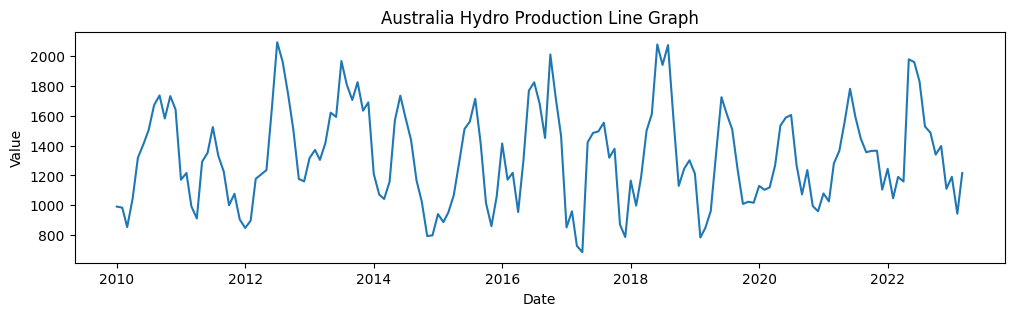

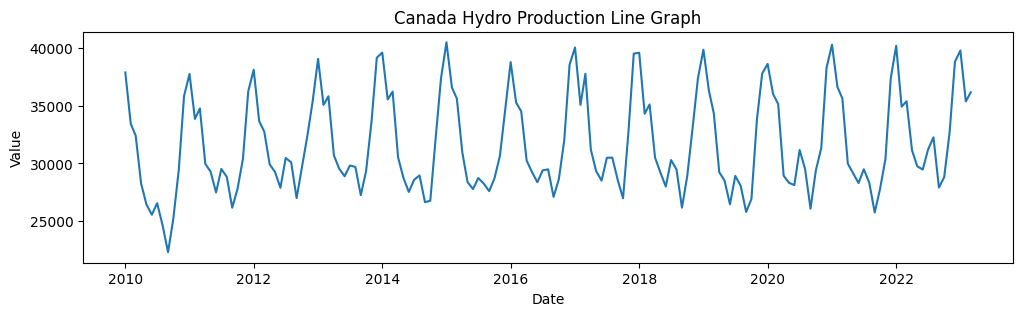

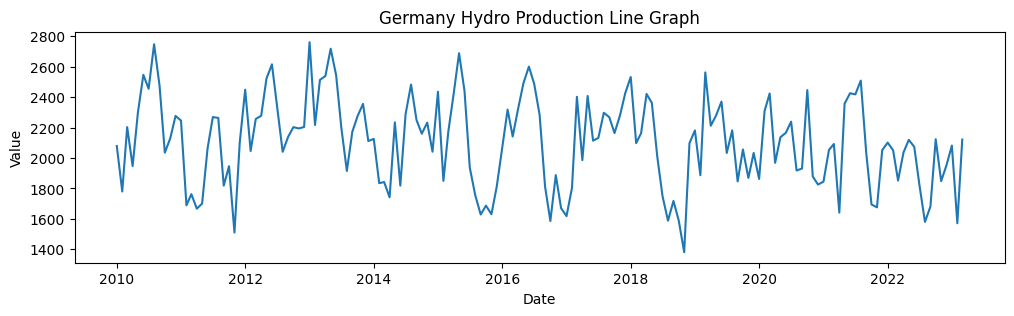

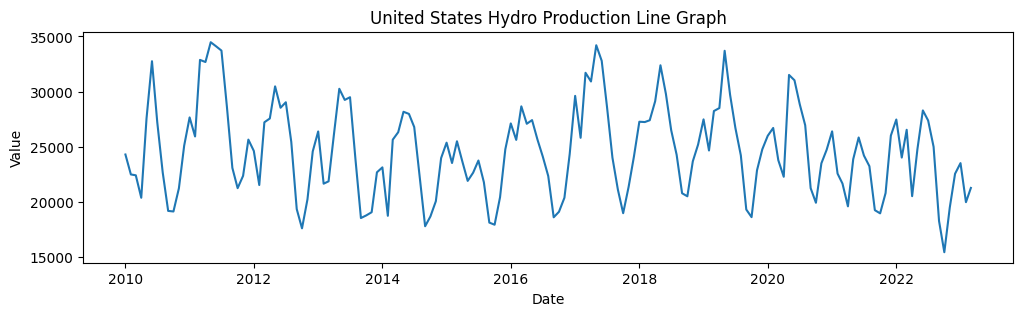

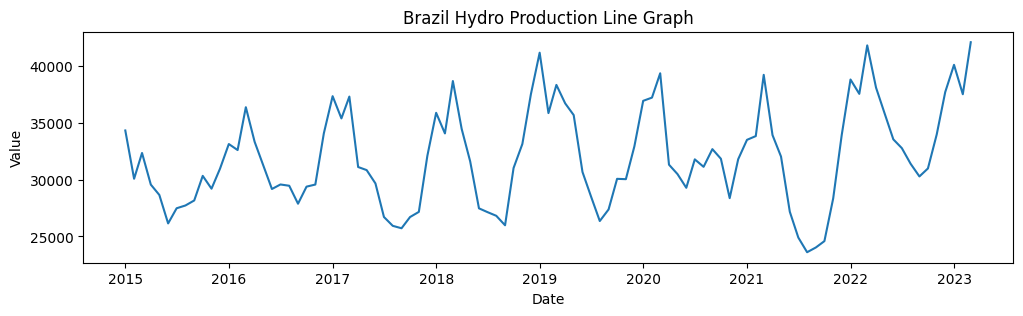

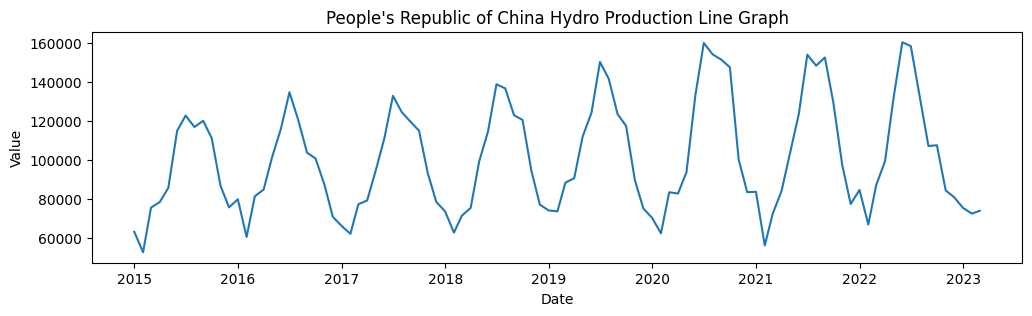

In [59]:
# Hydro
for country_data in final_hydro_production_data:
    # Create the line plot
    plt.figure(figsize=(12, 3))
    plt.plot(final_hydro_production_data[country_data]['Date'], final_hydro_production_data[country_data]['Value'])
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(country_data + ' Hydro Production Line Graph')
    
    # Display the plot
    plt.show()

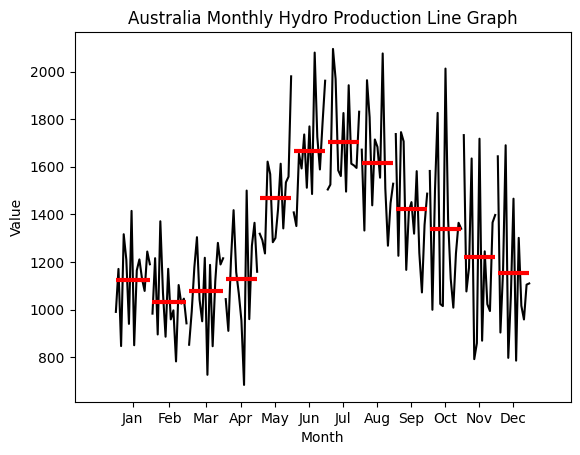

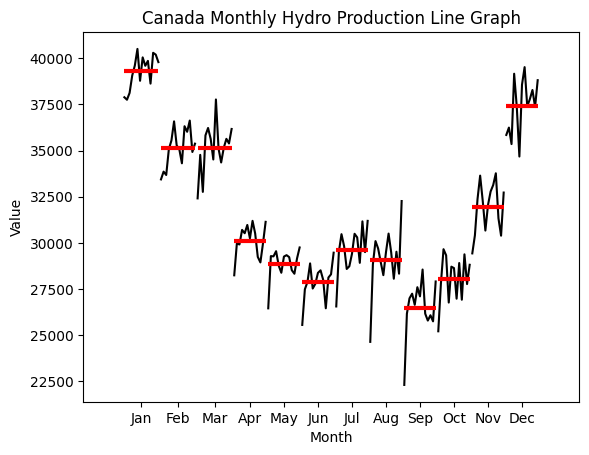

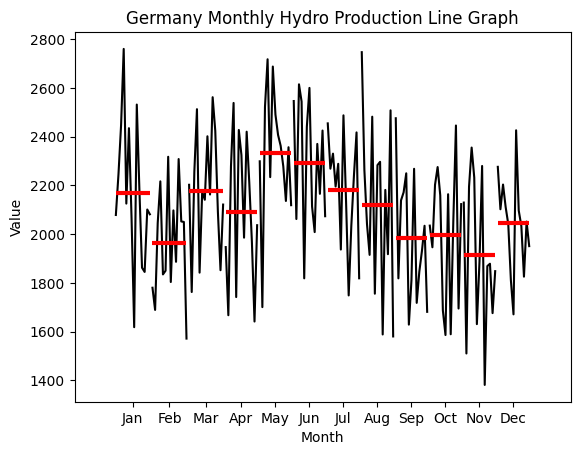

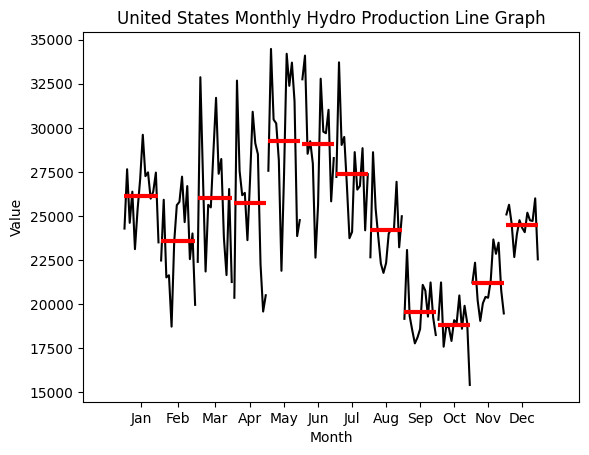

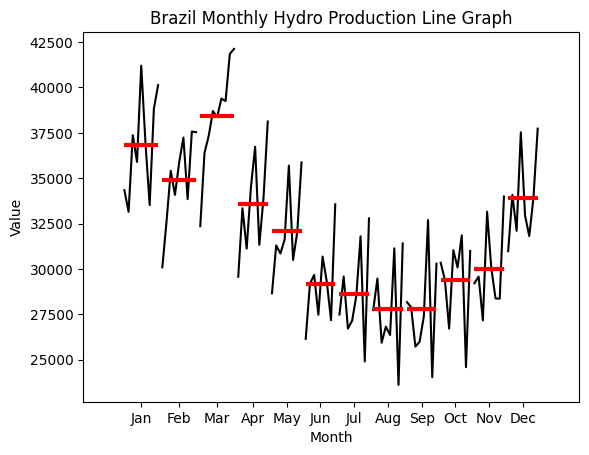

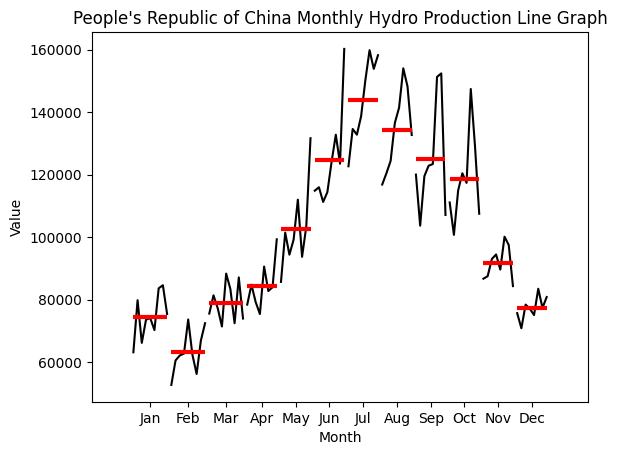

In [60]:
from statsmodels.graphics.tsaplots import month_plot

for country_data in final_hydro_production_data:
    # Create the line plot
    data = final_hydro_production_data[country_data].copy()
    
    data.set_index('Date', inplace=True)
    data = data.resample('M').mean()
    
    month_plot(data['Value'])
    
    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.title(country_data + ' Monthly Hydro Production Line Graph')
    
    # Display the plot
    plt.show()

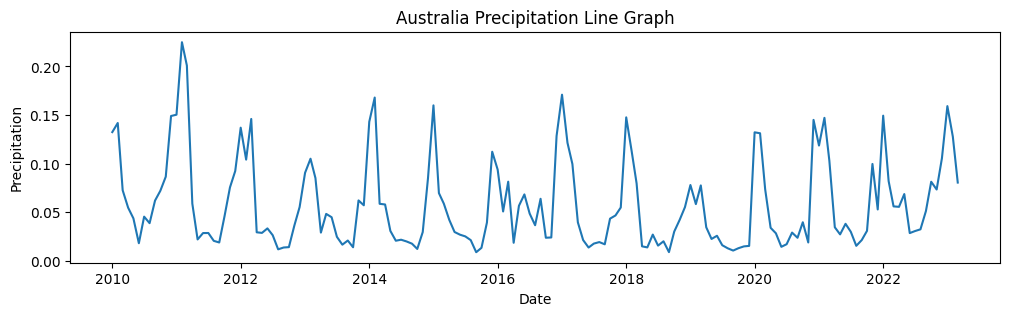

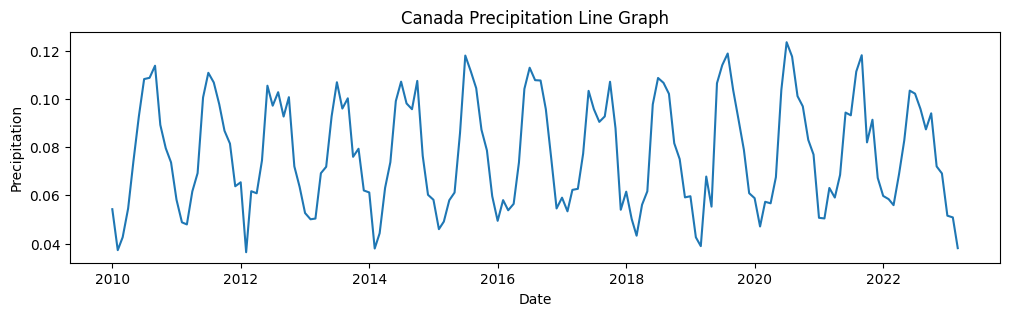

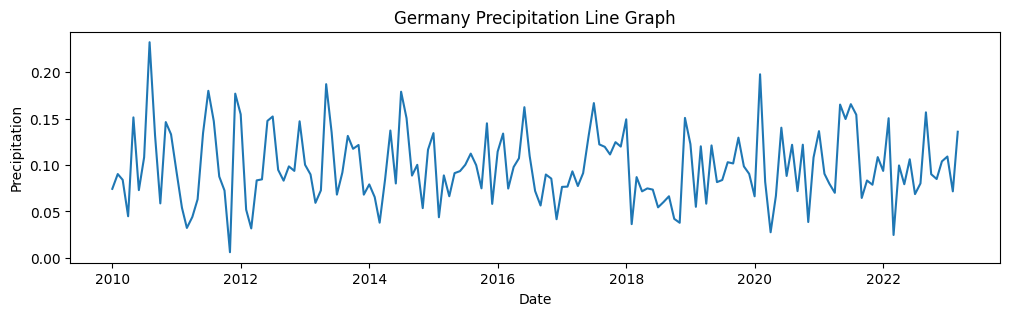

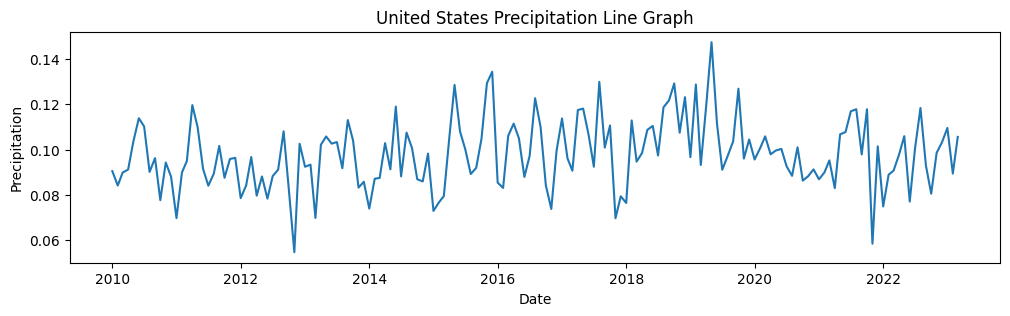

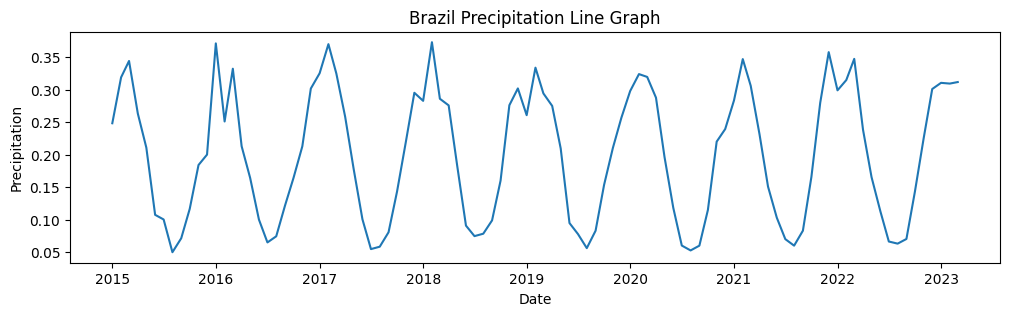

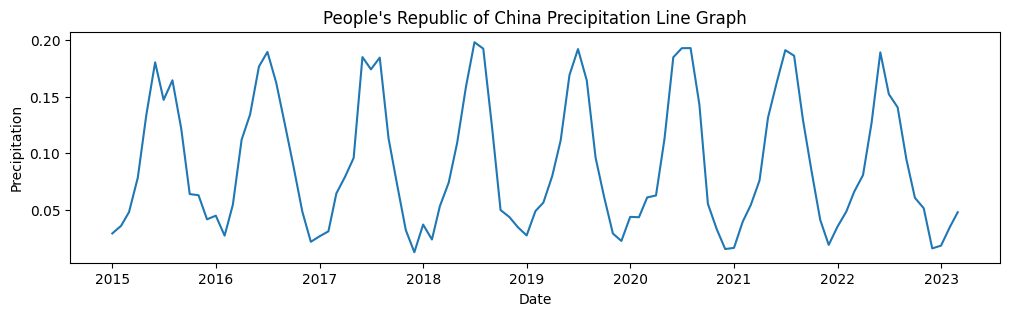

In [61]:
# Hydro
for country_data in final_hydro_production_data:
    # Create the line plot
    plt.figure(figsize=(12, 3))
    plt.plot(final_hydro_production_data[country_data]['Date'], final_hydro_production_data[country_data]['Precipitation'])
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.title(country_data + ' Precipitation Line Graph')
    
    # Display the plot
    plt.show()

### Wind

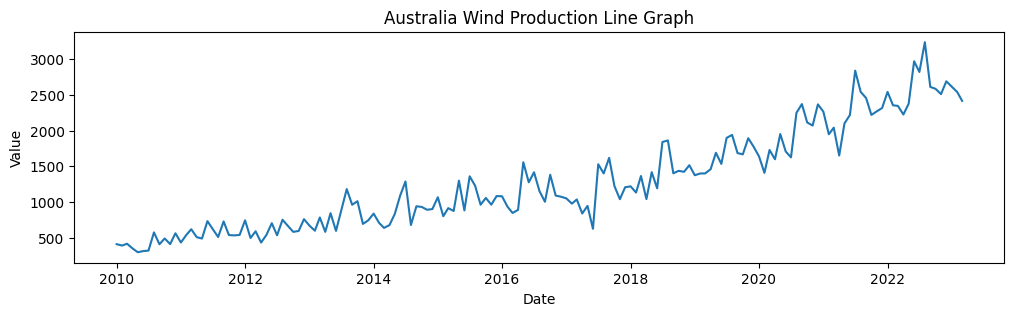

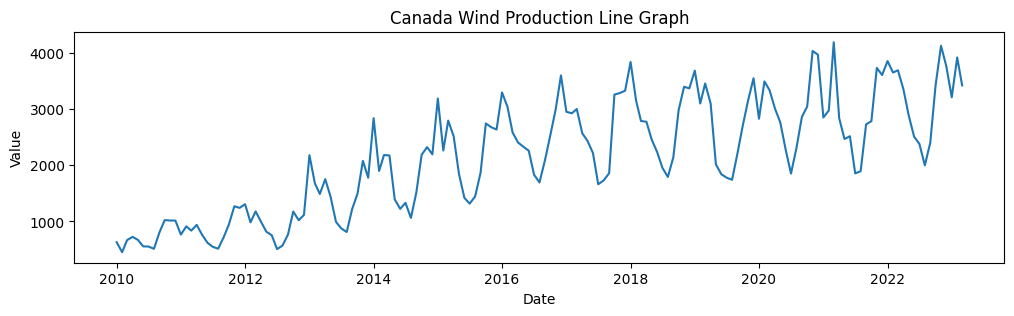

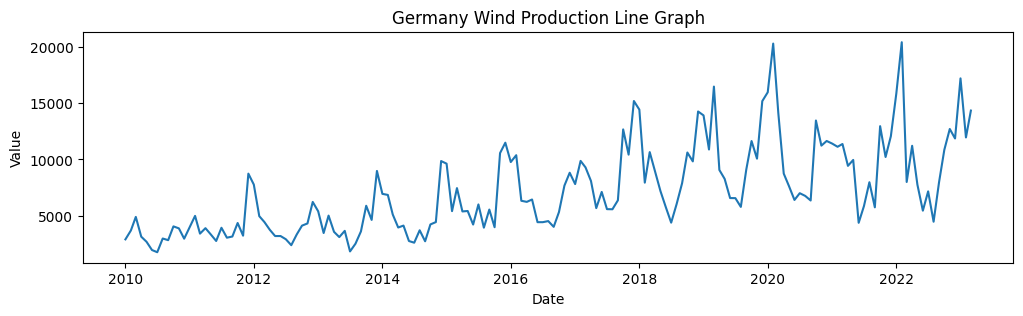

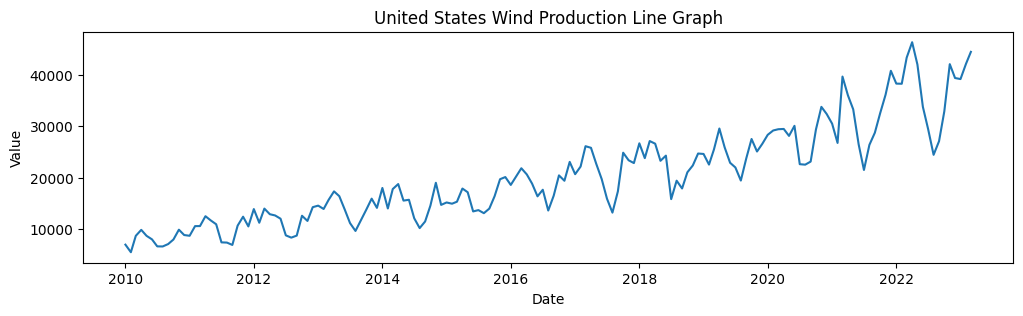

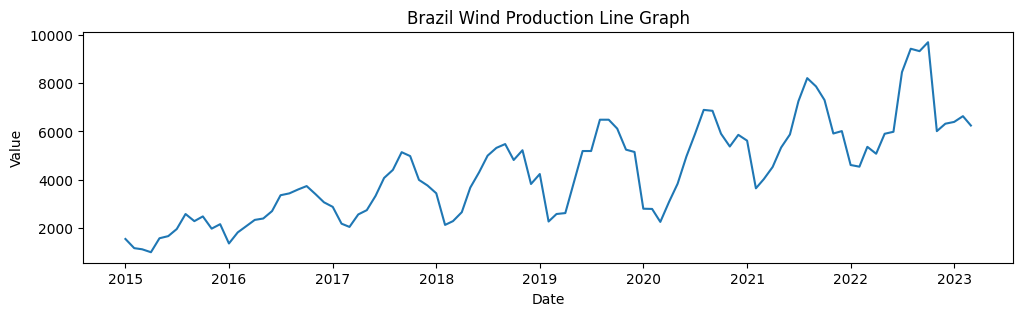

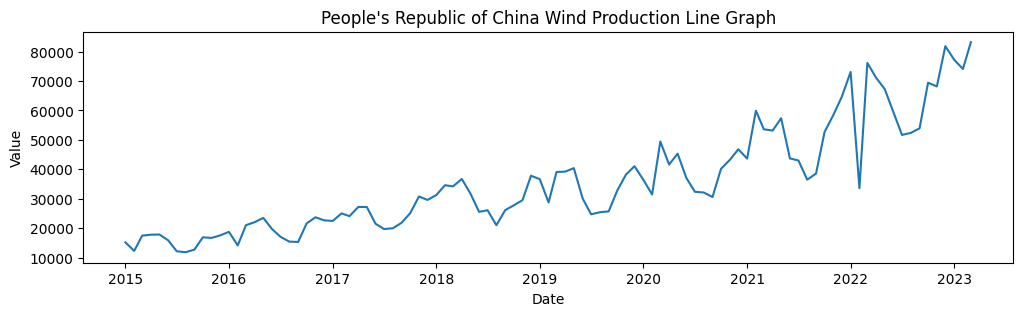

In [62]:
# Wind
for country_data in final_wind_production_data:
    # Create the line plot
    plt.figure(figsize=(12, 3))
    plt.plot(final_wind_production_data[country_data]['Date'], final_wind_production_data[country_data]['Value'])
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(country_data + ' Wind Production Line Graph')
    
    # Display the plot
    plt.show()

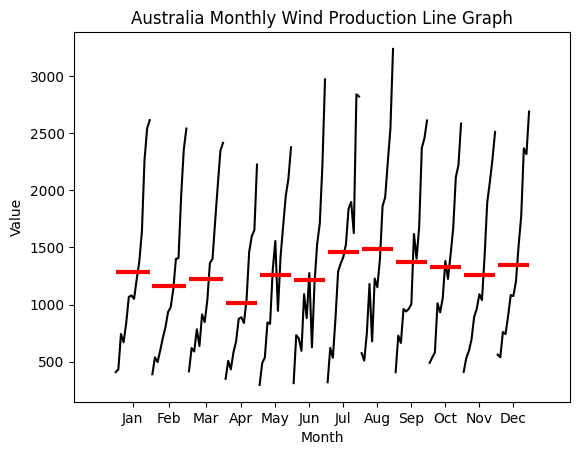

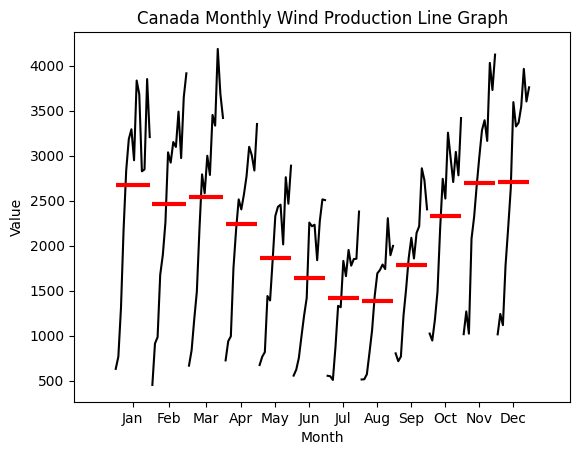

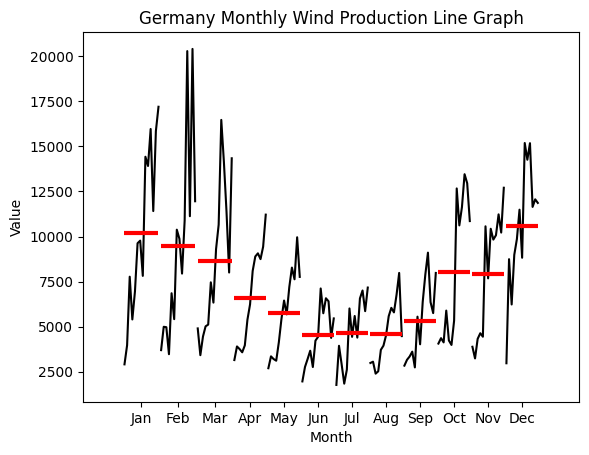

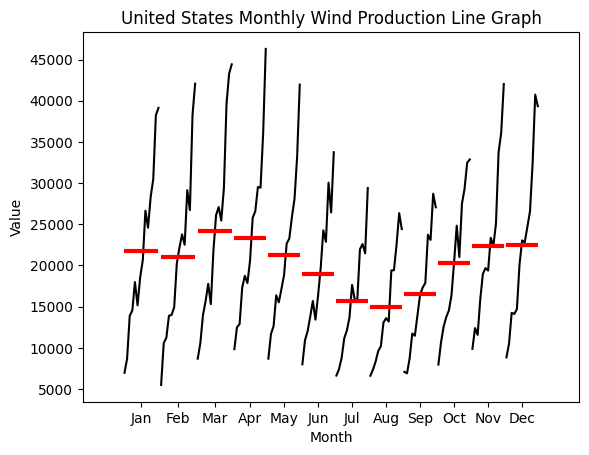

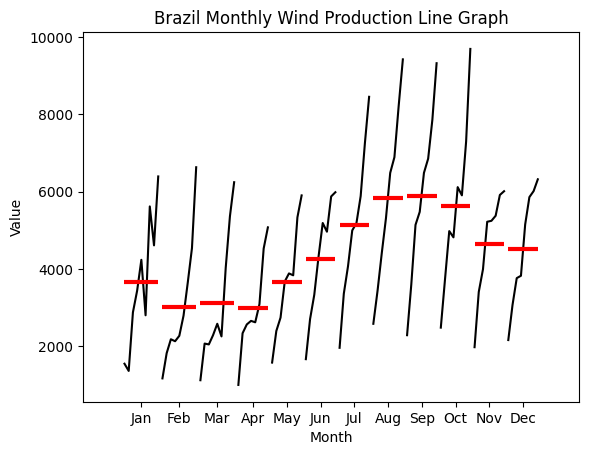

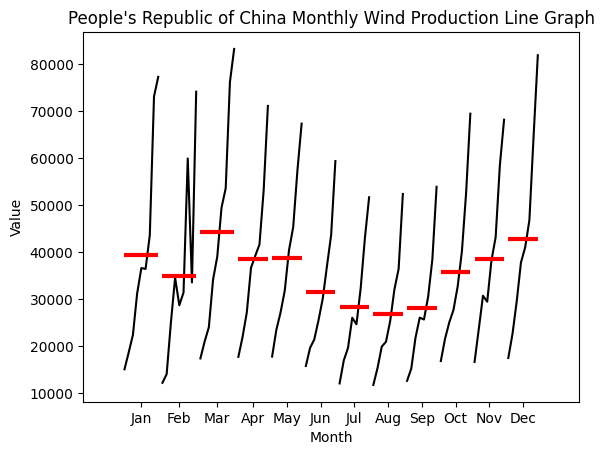

In [63]:
for country_data in final_wind_production_data:
    # Create the line plot
    data = final_wind_production_data[country_data].copy()
    
    data.set_index('Date', inplace=True)
    data = data.resample('M').mean()
    
    month_plot(data['Value'])
    
    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.title(country_data + ' Monthly Wind Production Line Graph')
    
    # Display the plot
    plt.show()

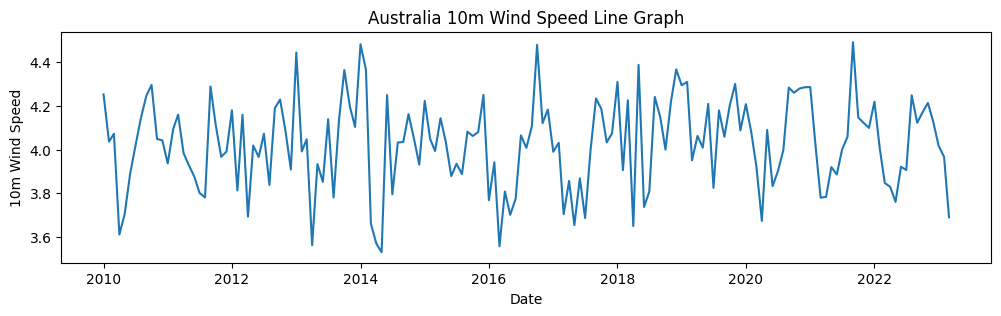

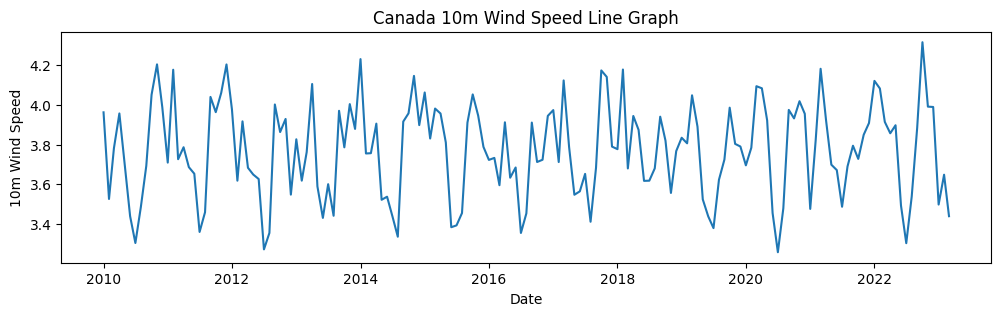

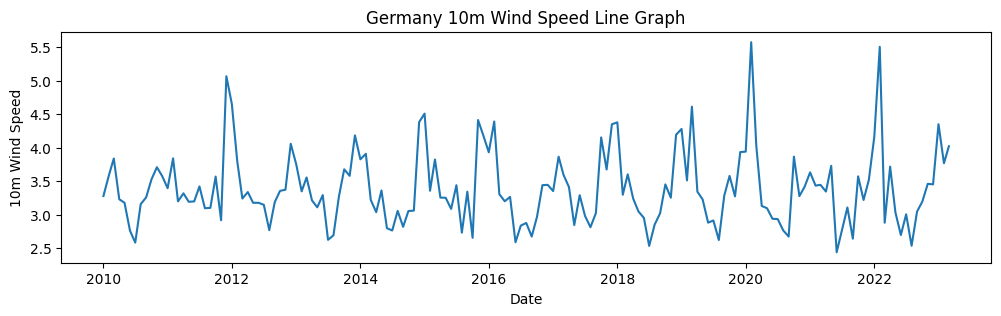

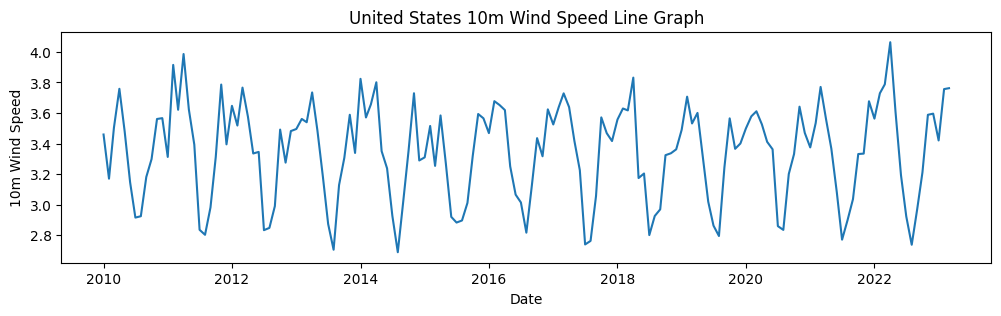

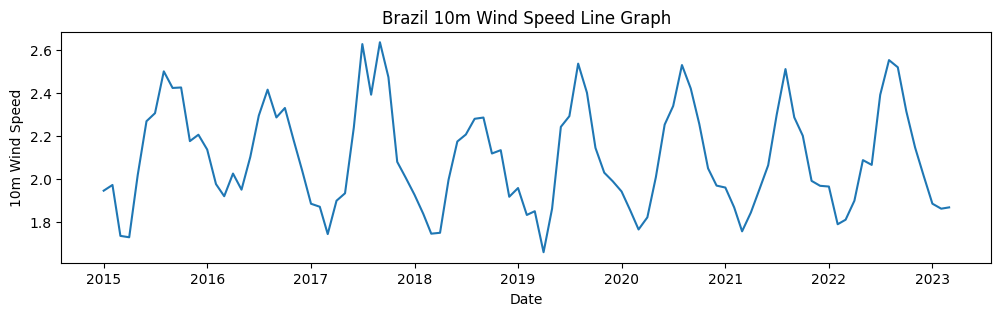

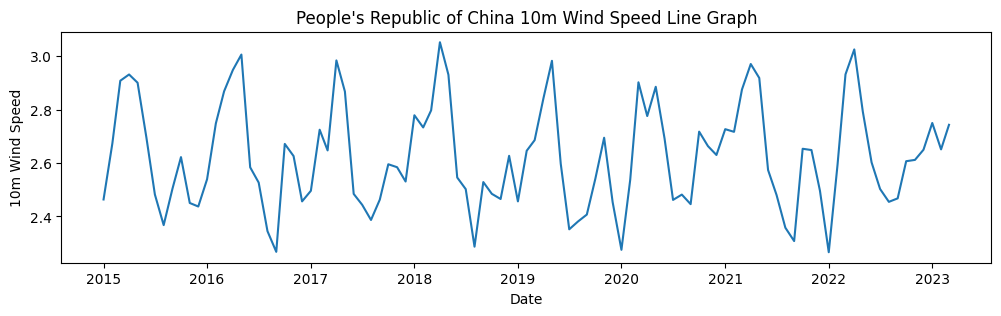

In [64]:
# Wind
for country_data in final_wind_production_data:
    # Create the line plot
    plt.figure(figsize=(12, 3))
    plt.plot(final_wind_production_data[country_data]['Date'], final_wind_production_data[country_data]['Wind10int'])
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('10m Wind Speed')
    plt.title(country_data + ' 10m Wind Speed Line Graph')
    
    # Display the plot
    plt.show()

### Solar

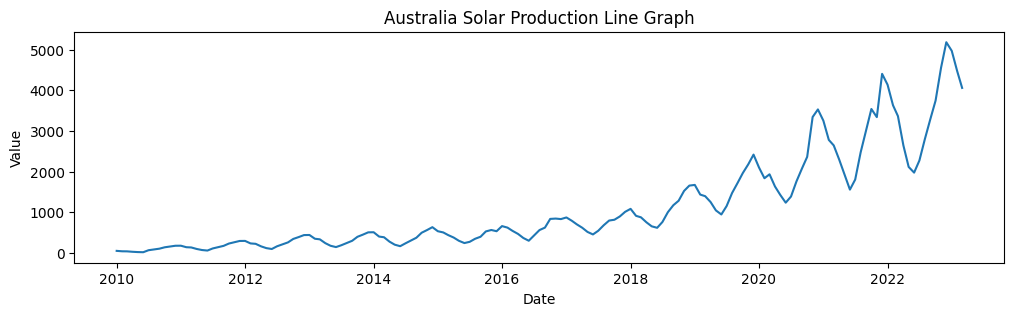

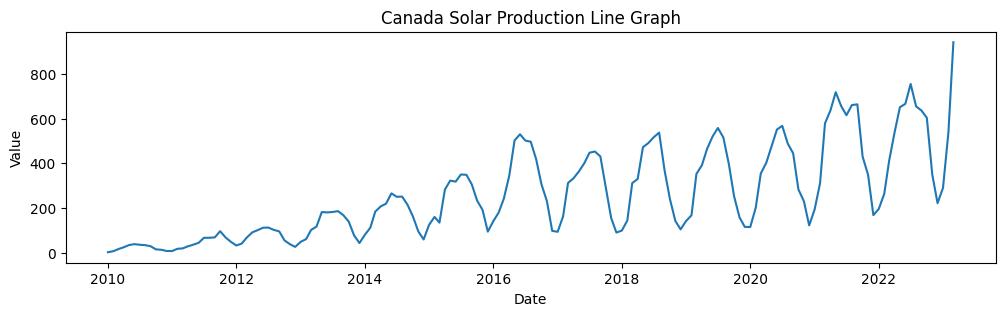

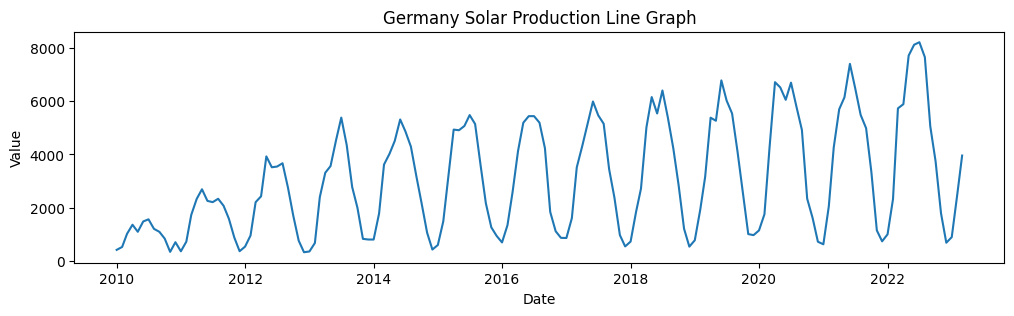

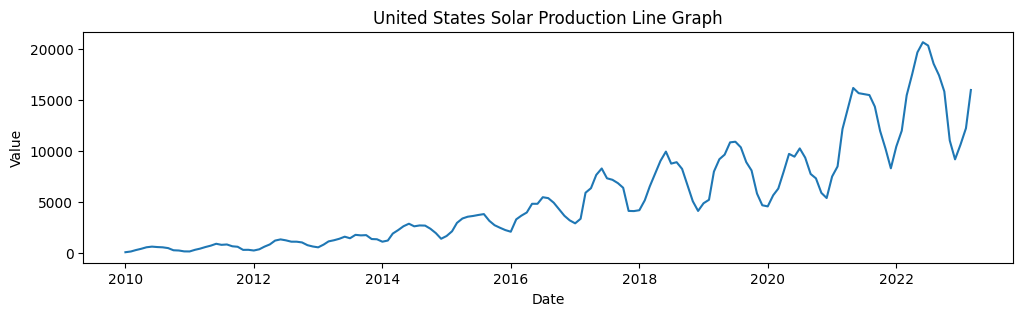

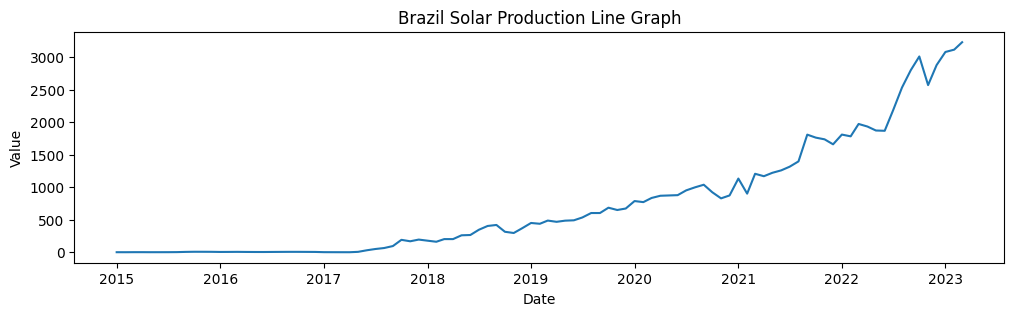

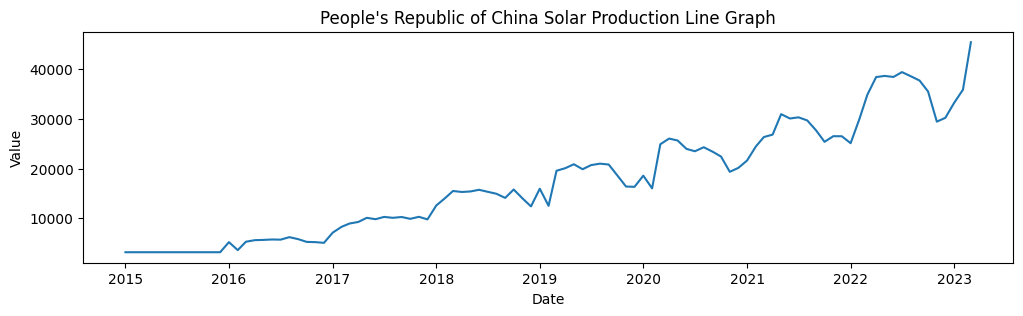

In [65]:
# Solar
for country_data in final_solar_production_data:
    # Create the line plot
    plt.figure(figsize=(12, 3))
    plt.plot(final_solar_production_data[country_data]['Date'], final_solar_production_data[country_data]['Value'])
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(country_data + ' Solar Production Line Graph')
    
    # Display the plot
    plt.show()

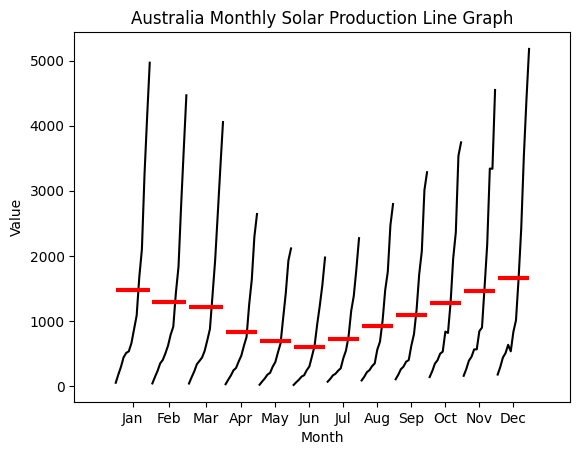

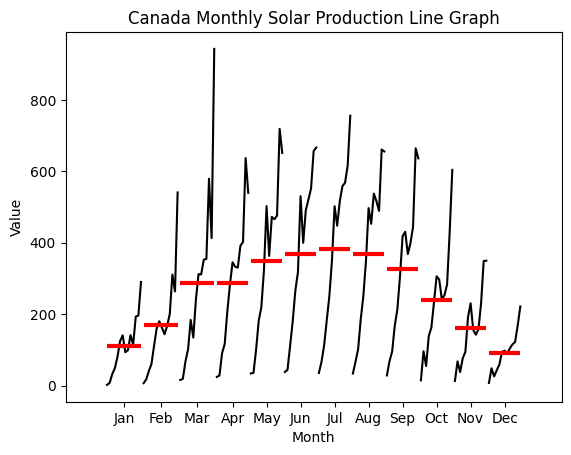

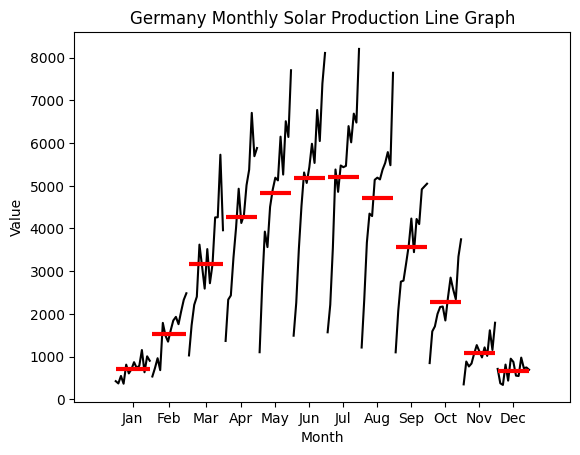

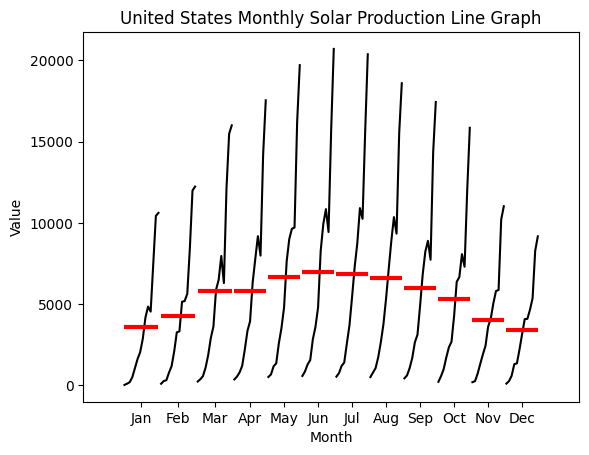

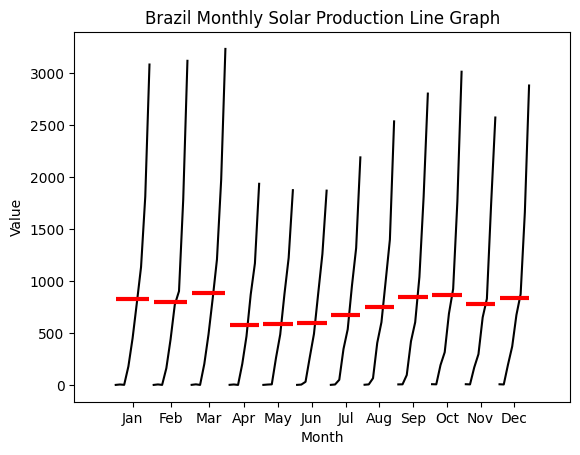

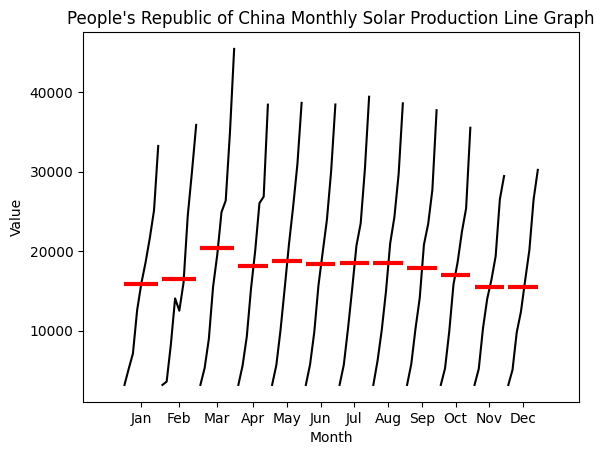

In [66]:
for country_data in final_solar_production_data:
    data = final_solar_production_data[country_data].copy()
    
    data.set_index('Date', inplace=True)
    data = data.resample('M').mean(numeric_only = True)
    
    #create monthly graph
    month_plot(data['Value'])
    
    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.title(country_data + ' Monthly Solar Production Line Graph')
    
    # Display the plot
    plt.show()

# Save Selected Cleaned Dataset to csv file

In [67]:
# Hydro dataset
for country in final_hydro_production_data:
    final_hydro_production_data[country]['Country'] = country
    final_hydro_production_data[country] = final_hydro_production_data[country][['Country'] + list(final_hydro_production_data[country].columns[:-1])]
    
# Concatenate the datasets into a single DataFrame
hydro_dataset = pd.concat(final_hydro_production_data.values())
# Reset the index of the concatenated DataFrame
hydro_dataset.reset_index(drop=True, inplace=True)

# Save the concatenated DataFrame to a CSV file
hydro_dataset.to_csv('F:\APU\FYP\Dataset\Cleaned_data\hydro_production_dataset.csv', index=False)

hydro_dataset.head()

,Country,Date,Value,Precipitation
0,Australia,2023-03-01,1215.8041,0.080641
1,Australia,2023-02-01,942.5558,0.127869
2,Australia,2023-01-01,1190.7296,0.159242
3,Australia,2022-12-01,1110.1523,0.105662
4,Australia,2022-11-01,1397.5839,0.073524


In [68]:
# Wind dataset
for country in final_wind_production_data:
    final_wind_production_data[country]['Country'] = country
    final_wind_production_data[country] = final_wind_production_data[country][['Country'] + list(final_wind_production_data[country].columns[:-1])]
    
# Concatenate the datasets into a single DataFrame
wind_dataset = pd.concat(final_wind_production_data.values())
# Reset the index of the concatenated DataFrame
wind_dataset.reset_index(drop=True, inplace=True)

# Save the concatenated DataFrame to a CSV file
wind_dataset.to_csv('F:\APU\FYP\Dataset\Cleaned_data\wind_production_dataset.csv', index=False)

wind_dataset.head()

,Country,Date,Value,Wind10int,Wind100int
0,Australia,2023-03-01,2415.8842,3.689722,5.550105
1,Australia,2023-02-01,2540.7584,3.966472,5.909515
2,Australia,2023-01-01,2614.8241,4.017246,5.866050
3,Australia,2022-12-01,2690.1965,4.128255,6.038626
4,Australia,2022-11-01,2510.9518,4.213749,6.209358


In [69]:
# Solar dataset
for country in final_solar_production_data:
    final_solar_production_data[country]['Country'] = country
    final_solar_production_data[country] = final_solar_production_data[country][['Country'] + list(final_solar_production_data[country].columns[:-1])]
    
# Concatenate the datasets into a single DataFrame
solar_dataset = pd.concat(final_solar_production_data.values())
# Reset the index of the concatenated DataFrame
solar_dataset.reset_index(drop=True, inplace=True)

# Save the concatenated DataFrame to a CSV file
solar_dataset.to_csv('F:\APU\FYP\Dataset\Cleaned_data\solar_production_dataset.csv', index=False)

solar_dataset.head()

,Country,Date,Value,Daylight,Temperature,GHI,DNI
0,Australia,2023-03-01,4055.6634,734.69403,26.204160,894897.94,693884.56
1,Australia,2023-02-01,4466.4801,778.22370,27.318323,997130.10,756902.75
2,Australia,2023-01-01,4967.0119,812.18915,27.128540,1009778.60,739408.44
3,Australia,2022-12-01,5179.1465,822.62040,26.521873,1087540.60,817223.80
4,Australia,2022-11-01,4548.5315,801.65320,23.784800,1055200.00,791037.10
